In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Lấy đường dẫn của thư mục hiện tại
current_directory = os.getcwd()

# Lấy đường dẫn của thư mục cha
parent_directory = os.path.dirname(current_directory)

# Tạo đường dẫn đầy đủ tới file CSV
csv_path = os.path.join(parent_directory, "Processed\\CartoonNetworkAsia_81Post_Processed.csv")

# Đọc file CSV
df = pd.read_csv(csv_path)

In [16]:
# thêm index cho dataframe
df = df.reset_index(inplace = False)
df["index"] = df["index"] + 1

In [17]:
df

,index,post_id,post_text,likes,comments,shares,reaction_count,like,love,wow,angry,haha,care,sad,hour,date,day
0,1,738496031649666,Celebrate #WB100 with sunset movies under the ...,37,0,0,45,37,6.0,1.0,1.0,0.0,0.0,0.0,11,2023-11-06,Monday
1,2,738486251650644,Unlock your Barbie and Chelsea alter ego! Try ...,14,2,1,16,14,1.0,0.0,0.0,1.0,0.0,0.0,11,2023-11-06,Monday
2,3,736838365148766,Looks like Tom won't be fishing in the Singapo...,7,4,19,10,7,0.0,0.0,0.0,3.0,0.0,0.0,19,2023-11-05,Sunday
3,4,737572781741991,The chase is on in the Singapore Botanic Garde...,453,14,68,789,453,170.0,2.0,4.0,140.0,18.0,2.0,19,2023-11-04,Saturday
4,5,736877231811546,Ready to rock some outdoor superhero moves? ⚡️...,83,0,6,122,83,32.0,2.0,1.0,1.0,3.0,0.0,10,2023-11-03,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,681911200641483,The claws are out this August with Cat-stravag...,429,28,54,571,429,121.0,4.0,1.0,3.0,13.0,0.0,10,2023-08-01,Tuesday
76,77,681542050678398,Toontastic Kenergy all around 💯 Which of these...,228,20,63,466,228,172.0,1.0,0.0,58.0,7.0,0.0,19,2023-07-31,Monday
77,78,681350087364261,Celebrate the 9 lives of Cats with Cat-stravag...,125,8,7,198,125,66.0,1.0,0.0,0.0,6.0,0.0,11,2023-07-31,Monday
78,79,681290900703513,The iconic chase continues between Tom and Jer...,3309,281,1000,6216,3309,2069.0,45.0,31.0,33.0,127.0,602.0,9,2023-07-31,Monday


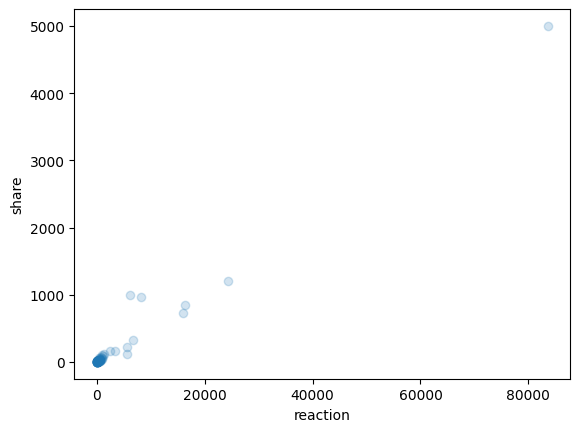

In [18]:
# tương quan giữa reaction và share
plt.scatter(df.reaction_count, df.shares, alpha = 0.2)

plt.xlabel("reaction")
plt.ylabel("share")

plt.show()

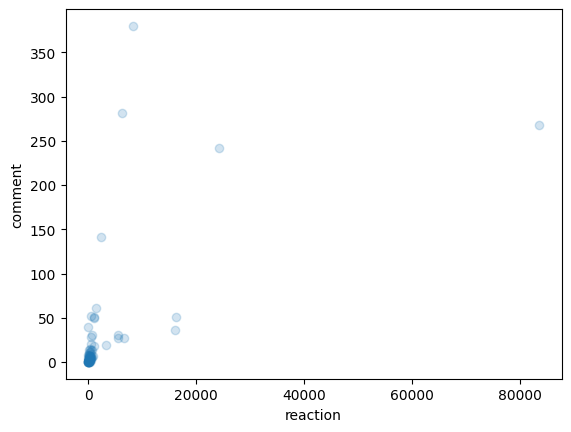

In [19]:
# tương quan giữa reaction và comment
plt.scatter(df.reaction_count, df.comments, alpha = 0.2)

plt.xlabel("reaction")
plt.ylabel("comment")

plt.show()

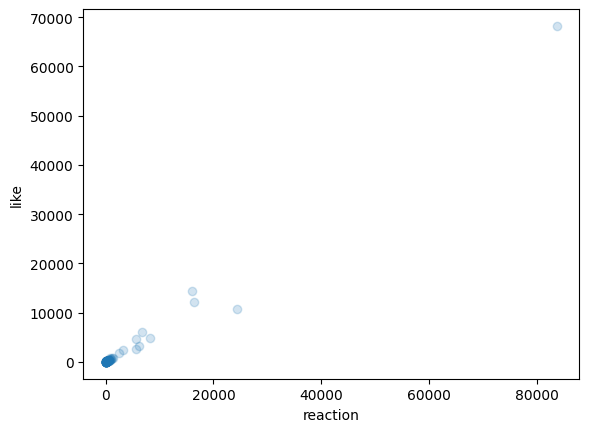

In [20]:
# tương quan giữa reaction và like
plt.scatter(df.reaction_count, df.like, alpha = 0.2)

plt.xlabel("reaction")
plt.ylabel("like")

plt.show()

In [21]:
# dictionary các loại reaction
react_dict = {
    'like': sum(df.like),
    'haha': sum(df.haha),
    'angry': sum(df.angry),
    'wow': sum(df.wow),
    'sad': sum(df.sad),
    'care': sum(df.care),
    'love': sum(df.love)
}

In [22]:
react_dict

{'like': 144841,
 'haha': 24324.0,
 'angry': 199.0,
 'wow': 575.0,
 'sad': 870.0,
 'care': 2020.0,
 'love': 26158.0}

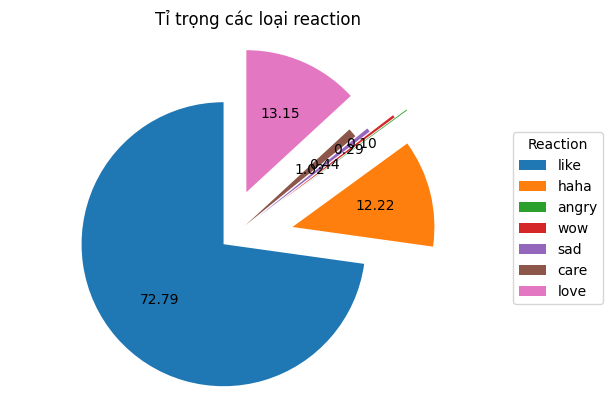

In [23]:
# tỉ trọng giữa các loại reaction
react = []
number = []

explode = (0.0, 0.5, 0.6, 0.5, 0.3, 0.2, 0.4)

for x, y in react_dict.items():
    react.append(x)
    number.append(y)

plt.pie(number, labels=['']*len(react), autopct='%.2f', explode = explode, startangle = 90)

plt.axis('equal')
plt.title("Tỉ trọng các loại reaction")

plt.legend(react, title="Reaction", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [24]:
# tỉ trọng giữa các loại reaction
react_dict_2 = {
    'like': sum(df.like),
    'haha': sum(df.haha),
    'care': sum(df.care),
    'love': sum(df.love),
    'others': sum(df.angry) + sum(df.wow) + sum(df.sad)
}

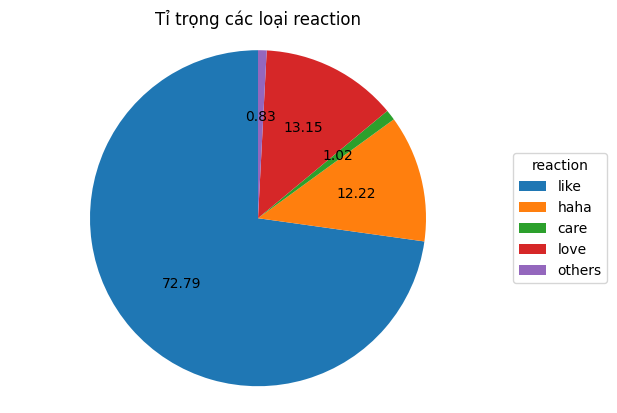

In [25]:
# tỉ trọng giữa các loại reaction
react = []
number = []

explode = (0.0, 0.5, 0.6, 0.5, 0.3)

for x, y in react_dict_2.items():
    react.append(x)
    number.append(y)

plt.pie(number, labels=['']*len(react), autopct='%.2f', startangle = 90)

plt.axis('equal')
plt.title("Tỉ trọng các loại reaction")

plt.legend(react, title="reaction", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

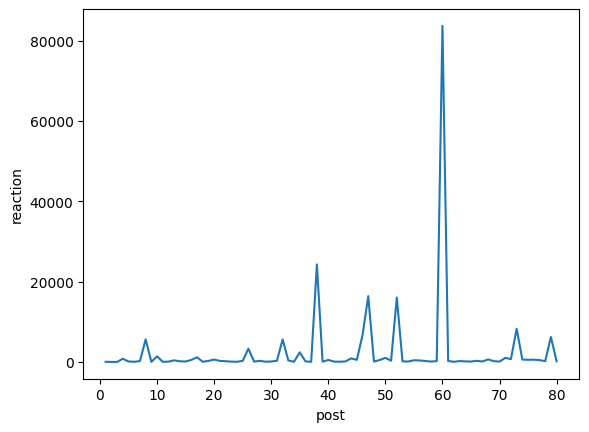

In [26]:
# biến động số lượng reaction
plt.plot(df['index'], df['reaction_count'])

plt.xlabel('post')
plt.ylabel('reaction')

plt.show()